In [12]:
import numpy as np
from matplotlib import pyplot as plt

In [17]:
# Load in data results

output_dtype = np.dtype([
    ('template_id', int),
    ('snr_A', float),
    ('snr_E', float),
    ('joint_snr', float),
    ('idx_A', int),
    ('idx_E', int),
    ('time_A', float),
    ('time_E', float),
])


def output_data(line):
    sl = line.split()
    template_id = int(sl[0].strip(','))
    snr_A = float(sl[1].strip(',('))
    snr_E = float(sl[2].strip(',)'))
    joint_snr = float(sl[3].strip(','))
    idx_A = int(sl[4].strip(',('))
    idx_E = int(sl[5].strip(',)'))
    time_A = float(sl[6].strip(',('))
    time_E = float(sl[7].strip(',)'))
    arr_out = [
        template_id,
        snr_A,
        snr_E,
        joint_snr,
        idx_A,
        idx_E,
        time_A,
        time_E,
    ]
    return arr_out

def data_results_reader(filename, lines=None):
    i=0
    with open(filename, 'r') as fp:
        for row in fp:
            if row.startswith('['):
                yield output_data(row.strip('[]\n'))
                if lines is not None and i > lines:
                    break
                i += 1

data_array = data_results_reader('data_results.txt')

i=0
snrs = -1 * np.ones(3000, dtype=float)
times = -1 * np.ones(3000, dtype=float)


for da in data_array:
    snrs[i] = da[3]
    times[i] = da[6]
    i += 1

valid = snrs > 0
snrs = snrs[valid]
times = times[valid]

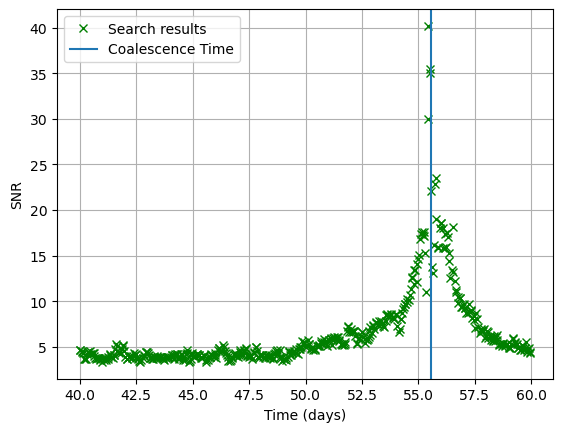

In [23]:
fig, ax = plt.subplots(1)

truth_time_s = 4800021.15572853

ax.plot(times / 86400, snrs, marker='x', linewidth=0, color='g', label="Search results")
ax.axvline(truth_time_s / 86400, label="Coalescence Time")
ax.set_xlabel("Time (days)")
ax.set_ylabel("SNR")
ax.legend(loc="upper left")
ax.grid()

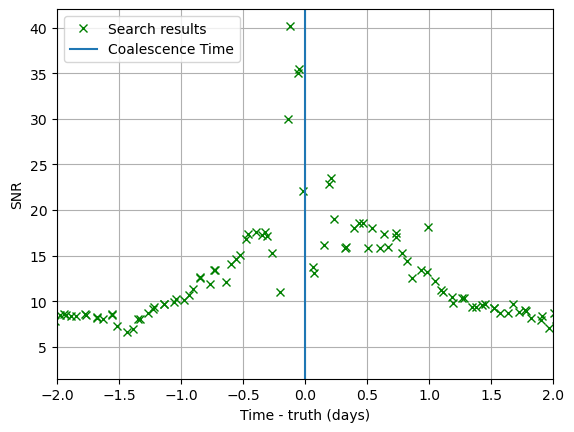

In [27]:
fig, ax = plt.subplots(1)

ax.plot((times - truth_time_s) / 86400, snrs, marker='x', linewidth=0, color='g', label="Search results")
ax.axvline(0, label='Coalescence Time')
ax.set_xlim(-2, 2)
ax.set_xlabel("Time - truth (days)")
ax.set_ylabel("SNR")
ax.grid()
ax.legend(loc='upper left')